<a href="https://colab.research.google.com/github/enakai00/colab_rlbook/blob/master/Chapter01/02_Bandit_Algorithm_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[BA2-01]**

Import modules.

In [0]:
import numpy as np
from pandas import DataFrame
import matplotlib
matplotlib.rcParams['font.size'] = 12

**[BA2-02]**

Define the Bandit class.

In [0]:
class Bandit:
  def __init__(self, arms=10):
    self.arms = arms
    self.means = np.zeros(self.arms)

  def select(self, arm):
    reward = np.random.normal(loc=self.means[arm], scale=1.0)
    # Add random values to the means.
    self.means += np.random.normal(loc=0.0, scale=0.01, size=self.arms)
    return reward

**[BA2-03]**

Define a function to choose an action with the ε-greedy policy.

In [0]:
def get_action(qs, epsilon):
  if np.random.random() < epsilon:
    # Explore: choose randomly.
    return np.random.randint(len(qs))
  else:
    # Exploit: choose the arm with the max average.
    return np.argmax(qs)

**[BA2-04]**

Define a function to run an episode.

In [0]:
def episode(bandit, alpha, steps):
  total_rewards = [0]
  qs = [0] * bandit.arms
  count = [0] * bandit.arms

  for _ in range(steps):
    arm = get_action(qs, epsilon=0.1)
    reward = bandit.select(arm)
    # Append total rewards
    total_rewards.append(total_rewards[-1] + reward)

    # Update an estimate of the mean.
    if alpha == 0: # Use an average to estimate the mean.
      count[arm] += 1
      qs[arm] += (reward - qs[arm]) / count[arm]
    else: # Update an estimate with a constant weight.
      qs[arm] += alpha * (reward - qs[arm])

  return total_rewards

**[BA2-05]**

Run episodes with various alphas.

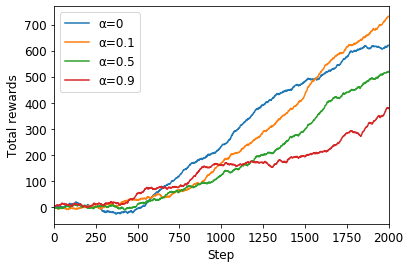

In [10]:
rewards = {}
for alpha in [0, 0.1, 0.5, 0.9]:
  bandit = Bandit()
  rewards['α={}'.format(alpha)] = episode(bandit, alpha, steps=2000)

ax = DataFrame(rewards).plot()
_ = ax.set_xlabel('Step')
_ = ax.set_ylabel('Total rewards')

**[BA2-06]**

Define a function to apply the grid search for α.

In [0]:
def hypertune(values, num_samples):
  rewards = {}
  for alpha in values:
    scores = []
    for _ in range(num_samples):
      bandit = Bandit() # Prepare a new environment.
      result = episode(bandit, alpha, steps=2000)
      scores.append(result[-1]) # Append the final (total) reward.
    rewards['{:1.1f}'.format(alpha)] = scores

  ax = DataFrame(rewards).plot(kind='box', figsize=(6, 8))
  _ = ax.set_xlabel('α')
  _ = ax.set_ylabel('Total rewards')

**[BA2-07]**

Apply the grid search and show results with box plots.

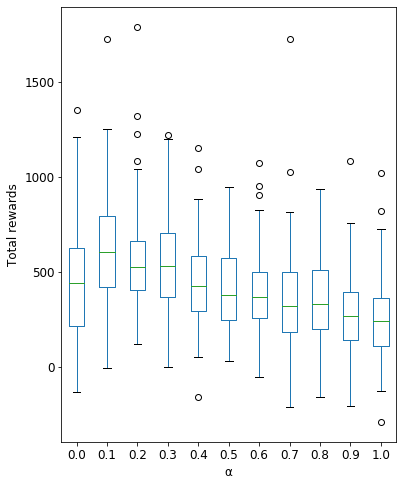

In [11]:
hypertune(np.linspace(0, 1.0, 11).tolist(), 100)